In [2]:
from pandas import DataFrame, read_csv

import matplotlib.pyplot as plt
import pandas as pd
import sys
import matplotlib

#Enable inline plotting
%matplotlib inline

In [8]:
print("Python version " + sys.version)
print("Pandas version " + pd.__version__)
print("Matplotlib version " + matplotlib.__version__)

Python version 3.9.6 (default, Jun 28 2021, 19:24:41) 
[Clang 12.0.5 (clang-1205.0.22.9)]
Pandas version 1.3.1
Matplotlib version 3.5.0.dev1656+g586fcffaae


In [9]:
# The initial set of baby names and birth rates
names = ['Bob', 'Jessica', 'Mary', 'John', 'Mel']
births = [968,155,77,578,973]

In [11]:
zip?

Init signature: zip(self, /, *args, **kwargs)
Docstring:     
zip(*iterables) --> A zip object yielding tuples until an input is exhausted.

   >>> list(zip('abcdefg', range(3), range(4)))
   [('a', 0, 0), ('b', 1, 1), ('c', 2, 2)]

The zip object yields n-length tuples, where n is the number of iterables
passed as positional arguments to zip().  The i-th element in every tuple
comes from the i-th iterable argument to zip().  This continues until the
shortest argument is exhausted.
Type:           type
Subclasses:     


In [12]:
BabyDataSet = list(zip(names,births))

In [14]:
BabyDataSet #This is the dataSet

[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]

In [16]:
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])

In [18]:
df.to_csv?

Signature:
df.to_csv(
    path_or_buf: 'FilePathOrBuffer[AnyStr] | None' = None,
    sep: 'str' = ',',
    na_rep: 'str' = '',
    float_format: 'str | None' = None,
    columns: 'Sequence[Hashable] | None' = None,
    header: 'bool_t | list[str]' = True,
    index: 'bool_t' = True,
    index_label: 'IndexLabel | None' = None,
    mode: 'str' = 'w',
    encoding: 'str | None' = None,
    compression: 'CompressionOptions' = 'infer',
    quoting: 'int | None' = None,
    quotechar: 'str' = '"',
    line_terminator: 'str | None' = None,
    chunksize: 'int | None' = None,
    date_format: 'str | None' = None,
    doublequote: 'bool_t' = True,
    escapechar: 'str | None' = None,
    decimal: 'str' = '.',
    errors: 'str' = 'strict',
    storage_options: 'StorageOptions' = None,
) -> 'str | None'
Docstring:
Write object to a comma-separated values (csv) file.

Parameters
----------
path_or_buf : str or file handle, default None
    File path or object, if None is provided the result is re

In [19]:
df.to_csv('births1880.csv', index=False, header=False)

In [20]:
read_csv?

Signature:
read_csv(
    filepath_or_buffer: 'FilePathOrBuffer',
    sep=<no_default>,
    delimiter=None,
    header='infer',
    names=<no_default>,
    index_col=None,
    usecols=None,
    squeeze=False,
    prefix=<no_default>,
    mangle_dupe_cols=True,
    dtype: 'DtypeArg | None' = None,
    engine=None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace=False,
    skiprows=None,
    skipfooter=0,
    nrows=None,
    na_values=None,
    keep_default_na=True,
    na_filter=True,
    verbose=False,
    skip_blank_lines=True,
    parse_dates=False,
    infer_datetime_format=False,
    keep_date_col=False,
    date_parser=None,
    dayfirst=False,
    cache_dates=True,
    iterator=False,
    chunksize=None,
    compression='infer',
    thousands=None,
    decimal: 'str' = '.',
    lineterminator=None,
    quotechar='"',
    quoting=0,
    doublequote=True,
    escapechar=None,
    comment=None,
    encoding=None,
    encoding_errors: 'str | None

In [26]:
Location = 'births1880.csv'
df = pd.read_csv(Location, header=None) # to prevent data from getting merge into the header

In [27]:
df

,0,1
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [28]:
df = pd.read_csv(Location, names=['Names', 'Births'])

In [29]:
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


# Prepare the Data

The Births column should just contain integers representing the number of babies born in a specific year with a specific name. We can check if the all the data is of the data type integer. It would not make sense to have this column have a data type of float. I would not worry about any possible outliers at this point of the analysis.

In [30]:
# check the data type of the columns 
df.dtypes

Names     object
Births     int64
dtype: object

In [31]:
# check data type of Births column
df.Births.dtype # int64 means no floats of decimals will be present

dtype('int64')

# Analyze Data

 - To find the most popular name or the baby name with the highest birth rate, we can do one of the following
     - Sort the datafram and select the top row
     - Use the max() attribute to find the maximum value
   


In [32]:
# Method 1
Sorted = df.sort_values(['Births'], ascending=False)


In [34]:
Sorted.head(1)

,Names,Births
4,Mel,973


In [35]:
# Method 2
df['Births'].max()

973

# Creating a graph

<AxesSubplot:>

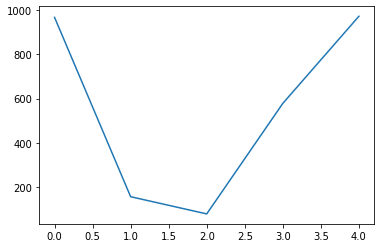

In [36]:
df['Births'].plot()

In [37]:
# Maximum value in the data set
MaxValue = df['Births'].max()

In [38]:
# Name associated with the maximum value
MaxName = df['Names'][df['Births'] == df['Births'].max()].values

In [42]:
Text = str(MaxValue) + " - " + MaxName # Text to display on graph

In [47]:
# Add text to graph
plt.annotate(Text, xy=(1, MaxValue), 
                   xytext=(25, 0), 
                   xycoords=('axes fraction', 'data'), 
                   textcoords='offset points',
                   arrowprops=dict(arrowstyle='-|>'))

Text(25, 0, "['973 - Mel']")

ValueError: Image size of 457x211608 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>